In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
from copy import deepcopy

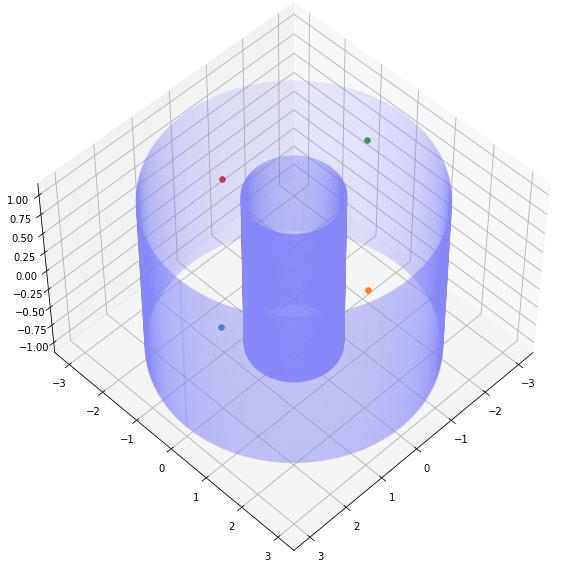

In [2]:

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
s = 30

h = np.linspace(-1, 1, 100)
fi = np.linspace(0, 2*np.pi, 1000)
r1 = 1
r2 = 3
x1 = [np.cos(a)*r1 for a in fi]
y1 = [np.sin(a)*r1 for a in fi]
x2 = [np.cos(a)*r2 for a in fi]
y2 = [np.sin(a)*r2 for a in fi]
for i in h:
    ax.scatter(x1, y1, i, s=1, color = '#88F3')
    ax.scatter(x2, y2, i, s=1, color = '#88F3')
    
A = [2, 0, 0]
B = [0, 2, 0.5]
C = [-2, 0, 1]
D = [0, -2, 0.5]
ax.scatter(A[0], A[1], A[2], s=s)
ax.scatter(B[0], B[1], B[2], s=s)
ax.scatter(C[0], C[1], C[2], s=s)
ax.scatter(D[0], D[1], D[2], s=s)

ax.view_init(elev=50, azim=45)

Область, заданная в виде кольца

In [3]:
def DrawDots(plt, lst, c = "#000", s = 50):
    i = 0
    for el in lst:
        plt.scatter(el[0], el[1], s = s, c=c)
        plt.text(el[0]+0.005, el[1]+0.005, str(i), fontsize=12)
        i+=1

[]

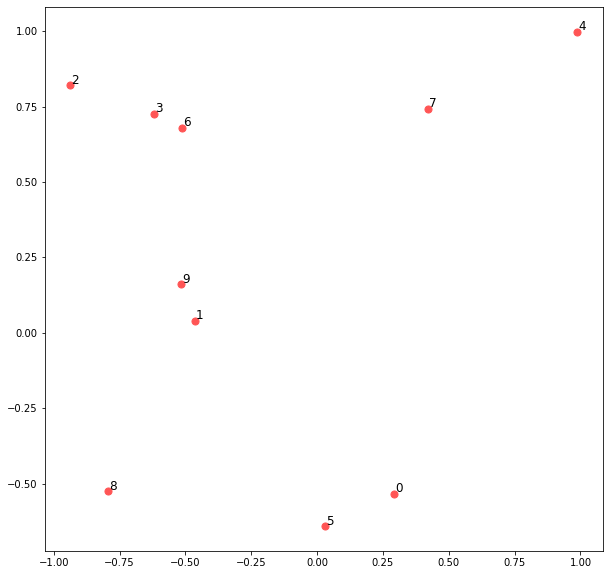

In [4]:
a = []
dlen = 10
for i in range(dlen):
    x = random.uniform(-1, 1)
    y = random.uniform(-1, 1)
    el = [x, y]
    a.append(el)
    
plt.figure(figsize=(10, 10))
DrawDots(plt, a, c = "#F55")
plt.plot()

In [5]:
def GetDist(p1, p2):
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)
    

def GetClosestIndex(lst: list, pnt: list, num:int = 0, excludeindexes:list = []):
    tmp = []
    for i in range(len(lst)):
        if not (i in excludeindexes):
            tmp.append([lst[i][0], lst[i][1], i])
        
    tmp.sort(key = lambda x: GetDist(x, pnt))
    return tmp[num][2]


def DrawTriangle(plt, p1, p2, p3, c = "#000"):
    plt.plot([p1[0], p2[0], p3[0], p1[0]], [p1[1], p2[1], p3[1], p1[1]], c = c)
    

[]

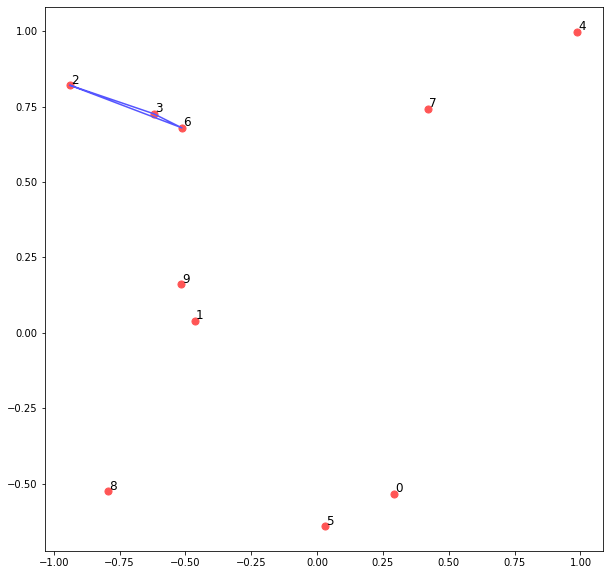

In [6]:
used = []
i1 = random.randint(0, dlen-1)
p1 = a[i1]
used.append(i1)

i2 = GetClosestIndex(a, p1, 1)
p2 = a[i2]
used.append(i2)

i3 = GetClosestIndex(a, p1, 2)
p3 = a[i3]
used.append(i3)

triangles = []
triangles.append([i1, i2, i3])

plt.figure(figsize=(10, 10))
DrawDots(plt, a, c = "#F55")
DrawTriangle(plt, p1, p2, p3, c = "#55F")
plt.plot()

In [7]:
def AddTriangle(p1, p2, p3, triangles):
    p1c = GetClosestIndex(a, a[p1], excludeindexes = used)
    p2c = GetClosestIndex(a, a[p2], excludeindexes = used)
    p3c = GetClosestIndex(a, a[p3], excludeindexes = used)

    p1d = GetDist(a[p1], a[p1c])
    p2d = GetDist(a[p2], a[p2c])
    p3d = GetDist(a[p3], a[p3c])

    pnt1 = 0
    pnt2 = 0

    if p1d < p2d and p1d < p3d:
        pnt1 = p1c
        pnt2 = p1
    elif p2d < p1d and p2d < p3d:
        pnt1 = p2c
        pnt2 = p2
    else:
        pnt1 = p3c
        pnt2 = p3

    def scalar(p1, p2, p3):
        v1 = [p2[0] - p1[0], p2[1] - p1[1]]
        v2 = [p3[0] - p1[0], p3[1] - p1[1]]
        return v1[0] * v2[0] + v1[1] * v2[1]

    pnt3 = 0
    if scalar(a[p1], a[p2], a[pnt1])*scalar(a[p1], a[p3], a[pnt1]) < 0:
        pnt3 = p3 if p3 != pnt2 else p2
    elif scalar(a[p2], a[p1], a[pnt1])*scalar(a[p2], a[p3], a[pnt1]) < 0:
        pnt3 = p1 if p1 != pnt2 else p3
    elif scalar(a[p3], a[p1], a[pnt1])*scalar(a[p3], a[p2], a[pnt1]) < 0:
        pnt3 = p1 if p1 != pnt2 else p2
    
    triangles.append([pnt1, pnt2, pnt3])
    return [pnt1, pnt2, pnt3]

[]

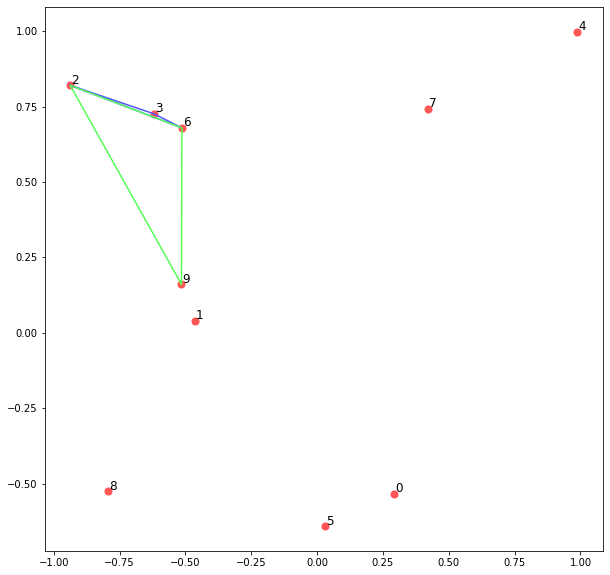

In [8]:
nw = AddTriangle(i1, i2, i3, triangles) 

for el in nw:
    if not(el in used):
        used.append(el)

plt.figure(figsize=(10, 10))
DrawDots(plt, a, c = "#F55")
DrawTriangle(plt, p1, p2, p3, c = "#55F")
DrawTriangle(plt, a[nw[0]], a[nw[1]], a[nw[2]], c = "#5F5")
plt.plot()